# Reto 02
**_Dr. Antonio Arista Jalife_**

En este ejemplo vamos a editar un poco los resultados que obtenemos de los árboles de decisión, y buscaremos alguna posible falla. Tomando como base el código del Ejemplo 02, vamos a construir un árbol de decisión.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
#Para las salidas, utilizaremos la variable Y
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Características: 
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)


In [3]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(x, y)

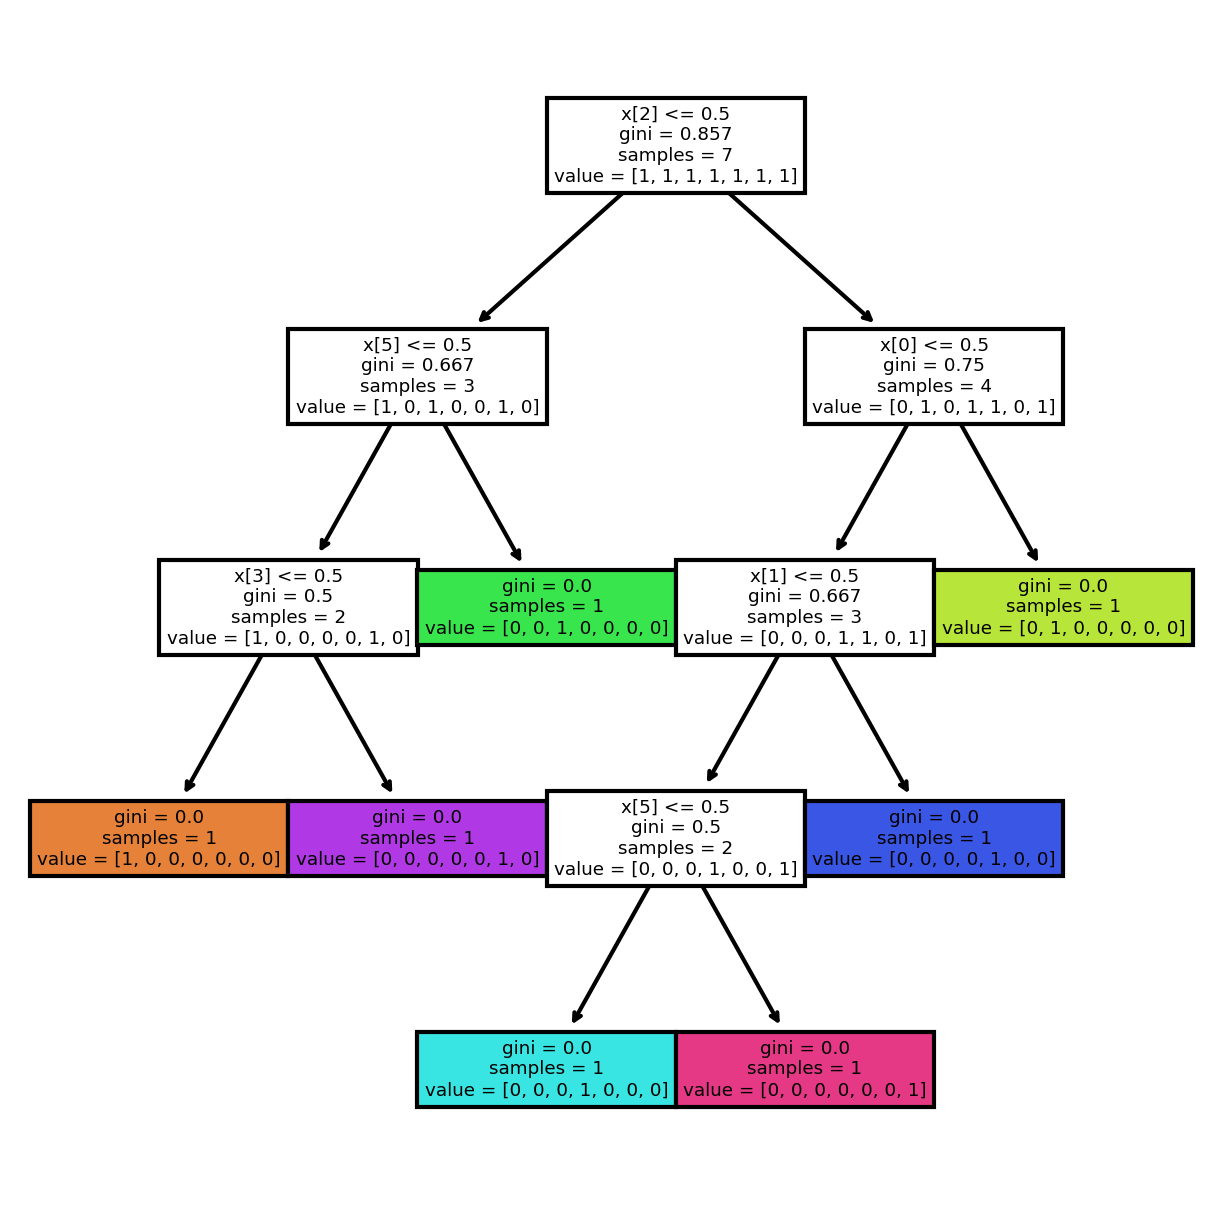

In [4]:
plt.figure(figsize = (5,5), dpi = 300)
tree.plot_tree(arbol,filled = True);
plt.show()

Ahora, veamos que sucede si jugamos un poco con los posibles resultados y algunas variaciones:

In [5]:
#Este sospechoso es José: Es exactamente igual a los datos del adivina quien.
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['José']


In [6]:
#Este sospechoso es José pero con lentes.
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['José']


In [7]:
#Este sospechoso es José pero con lentes y sombrero.
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Elly']


In [8]:
#Este sospechoso es José pero con sombrero.
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Elly']


¿Que sucedió aqui? Modificamos un poquito al sospechoso y se inclinó a ser mas de una clase que de otra. Esto puede ser un error grave de clasificación, sobre todo si utilizamos valores que no son absolutos (1 o 0) como estatura, peso o edad. Tenemos que ver una manera de evitar eso.